In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem,t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

In [4]:
df =pd.read_csv('loans_income.csv')
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


The Bootstrap

In [6]:
loans_income=np.array(pd.read_csv('loans_income.csv'))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [7]:
#making a falt list from list of lists
loans_income= np.array([item for sublist in loans_income for item in sublist])
loans_income

array([ 67000,  52000, 100000, ...,  50000,  82000,  70000], dtype=int64)

In [19]:
def bootstrap(l,R):
    n=len(loans_income)
    
    #Number of Bootstrap sample
    means_of_boot_sample =[]
    for reps in range(R):
        #step 1,2
        boot_sample =np.random.choice(loans_income,size=n)
        #step3
        means_of_boot_sample.append(round(np.mean(boot_sample),3))
    return means_of_boot_sample
bootstrap(loans_income, 5)

[69032.423, 68902.265, 68703.566, 68571.903, 68901.26]

Now  as we have  a means  of bootstarp sample we can estimate:
A .Their standard deviation (this estimates sample mean standard  error)

In [20]:
np.std(bootstrap(loans_income,100))

134.8120838952043

Produce a histogram

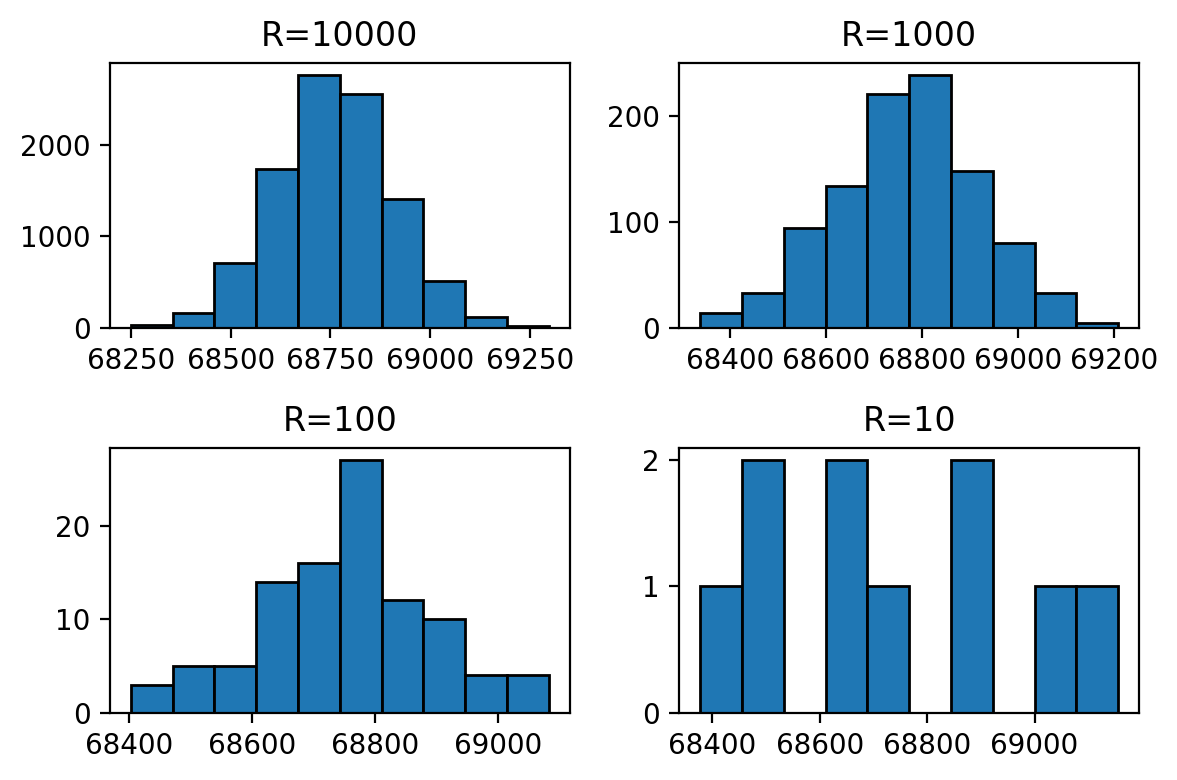

In [21]:
plt.figure(dpi=200)

plt.subplot(221)
plt.title('R=10000')
plt.hist(bootstrap(loans_income,10000),edgecolor ='k')


plt.subplot(222)
plt.title('R=1000')
plt.hist(bootstrap(loans_income,1000),edgecolor ='k')

plt.subplot(223)
plt.title('R=100')
plt.hist(bootstrap(loans_income,100),edgecolor ='k')

plt.subplot(224)
plt.title('R=10')
plt.hist(bootstrap(loans_income,10),edgecolor ='k')

plt.tight_layout()

As we can see distibution of 10000 means is more compact and bell-shaped than the distribution with smaller amount of means .This phenomenon is termed a s central limit theorem.
find a confidence interval

In [22]:
data =bootstrap(loans_income, 1000)
lower_lim ,upper_lim = np.percentile(data ,2.5), np.percentile(data,95)
print("lower linit : ",lower_lim)
print('Upper limit : ',upper_lim)

lower linit :  68470.457475
Upper limit :  69014.79329999999


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


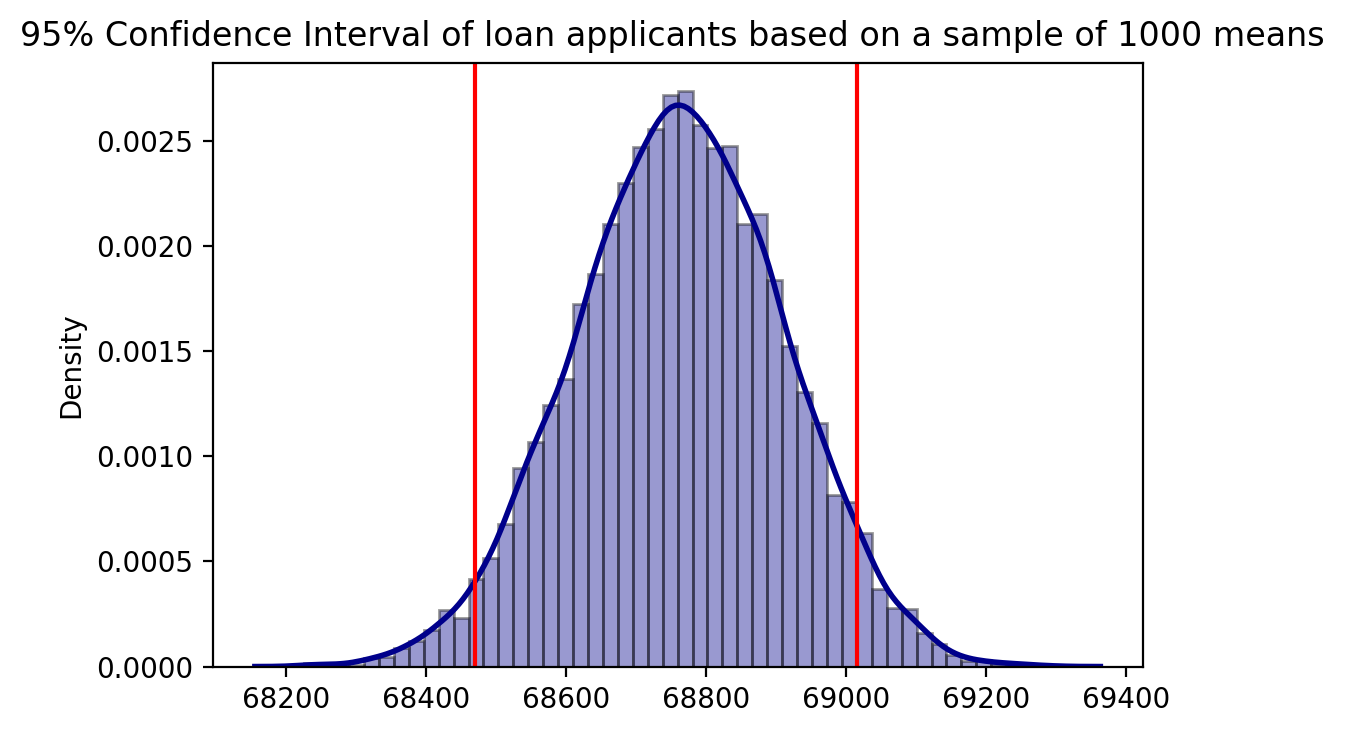

In [24]:
plt.figure(dpi= 200)
plt.title('95% Confidence Interval of loan applicants based on a sample of 10000 means ')

sns.distplot(bootstrap(loans_income,10000),hist =True,kde =True,
            color = 'darkblue',bins =50,
            hist_kws={'edgecolor':'black'},kde_kws={'linewidth':2})
plt.axvline(x=lower_lim,color ='red')
plt.axvline(x=upper_lim,color ='red')
